# 다양한 알고리즘 머신러닝 분류기를 사용해 뉴스 다중분류 해보자

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import tensorflow as tf
from tensorflow.keras.datasets import reuters

print(tf.__version__)
print(mpl.__version__)
print(sns.__version__)
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

2.6.0
3.4.3
0.11.2
1.21.4
1.3.3
1.0


## 데이터 준비; 단어-인덱스 사전 생성;

##### word_to_index, index_to_word

In [2]:
word_to_index = reuters.get_word_index(path="reuters_word_index.json")

In [3]:
len(word_to_index)

30979

In [4]:
index_to_word = { index+3 : word for word, index in word_to_index.items() }

+3 -> `<pad>`, `<sos>`, `<unk>`

In [5]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

##### index_to_word 함수

In [6]:
# index -> word 함수
def get_word(data):
    decoded_text = []
    for i in range(len(data)):
        t = ' '.join([index_to_word[index] for index in data[i]])
        decoded_text.append(t)
    return decoded_text

##### 모든 단어 사용

In [7]:
(x_train_none, y_train_none), (x_test_none, y_test_none) = reuters.load_data(num_words=None, test_split=0.2)

위에서 word_to_index의 크기를 확인해 num_words=None 일때의 단어 수가 30979개인 것을 알 수 있다.

In [8]:
x_train_none = get_word(x_train_none)
x_train_none[0]

'<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
x_test_none = get_word(x_test_none)
x_test_none[0]

'<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3'

##### 빈도수 상위 2,500개

In [10]:
(x_train_2500, y_train_2500), (x_test_2500, y_test_2500) = reuters.load_data(num_words=2500, test_split=0.2)

In [11]:
x_train_2500 = get_word(x_train_2500)
x_test_2500 = get_word(x_test_2500)

##### 빈도수 상위 5,000개

In [12]:
(x_train_5000, y_train_5000), (x_test_5000, y_test_5000) = reuters.load_data(num_words=5000, test_split=0.2)

In [13]:
x_train_5000 = get_word(x_train_5000)
x_test_5000 = get_word(x_test_5000)

##### 빈도수 상위 7,500개

In [14]:
(x_train_7500, y_train_7500), (x_test_7500, y_test_7500) = reuters.load_data(num_words=7500, test_split=0.2)

In [15]:
x_train_7500 = get_word(x_train_7500)
x_test_7500 = get_word(x_test_7500)

##### 빈도수 상위 10,000개

In [16]:
(x_train_10000, y_train_10000), (x_test_10000, y_test_10000) = reuters.load_data(num_words=10000, test_split=0.2)

In [17]:
x_train_10000 = get_word(x_train_10000)
x_test_10000 = get_word(x_test_10000)

##### 빈도수 상위 12,500개

In [18]:
(x_train_12500, y_train_12500), (x_test_12500, y_test_12500) = reuters.load_data(num_words=12500, test_split=0.2)

In [19]:
x_train_12500 = get_word(x_train_12500)
x_test_12500 = get_word(x_test_12500)

##### 빈도수 상위 15,000개

In [20]:
(x_train_15000, y_train_15000), (x_test_15000, y_test_15000) = reuters.load_data(num_words=15000, test_split=0.2)

In [21]:
x_train_15000 = get_word(x_train_15000)
x_test_15000 = get_word(x_test_15000)

##### 빈도수 상쉬 17,500개

In [22]:
(x_train_17500, y_train_17500), (x_test_17500, y_test_17500) = reuters.load_data(num_words=17500, test_split=0.2)

In [23]:
x_train_17500 = get_word(x_train_17500)
x_test_17500 = get_word(x_test_17500)

##### 빈도수 상위 20,000개

In [24]:
(x_train_20000, y_train_20000), (x_test_20000, y_test_20000) = reuters.load_data(num_words=20000, test_split=0.2)

In [25]:
x_train_20000 = get_word(x_train_20000)
x_test_20000 = get_word(x_test_20000)

## EDA

### 문장 길이 분포 확인

In [26]:
def analyze_text_length(x_train):
    length = [len(l.split(" ")) for l in x_train]
    print('훈련용 뉴스의 최대 길이 :{}'.format(max(length)))
    print('훈련용 뉴스의 평균 길이 :{}'.format(sum(length)/len(length)))
    
    plt.hist(length, bins=50)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.show()

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


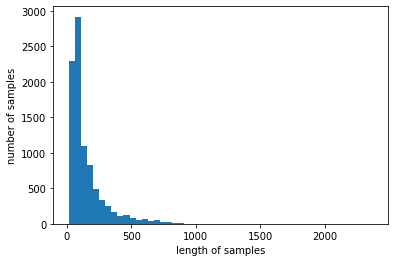

In [27]:
analyze_text_length(x_train_none)

### 클래스 빈도수 확인

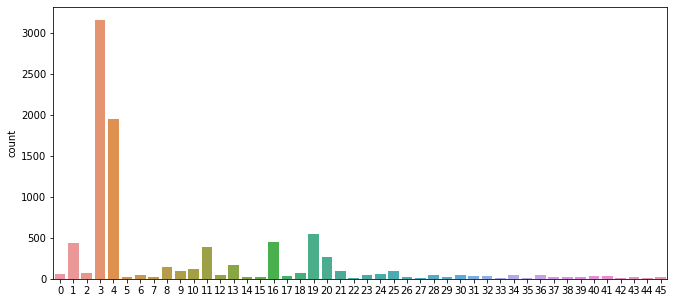

In [28]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train_none)
plt.show()

In [29]:
unique_elements, counts_elements = np.unique(y_train_none, return_counts=True)
print("각 클래스 빈도수:")
# print(np.asarray((unique_elements, counts_elements)))
class_frequencies = dict(zip(unique_elements, counts_elements))
print(dict(sorted(class_frequencies.items(), key=lambda x: x[1], reverse=True)))

각 클래스 빈도수:
{3: 3159, 4: 1949, 19: 549, 16: 444, 1: 432, 11: 390, 20: 269, 13: 172, 8: 139, 10: 124, 9: 101, 21: 100, 25: 92, 2: 74, 18: 66, 24: 62, 0: 55, 34: 50, 12: 49, 36: 49, 6: 48, 28: 48, 30: 45, 23: 41, 17: 39, 31: 39, 40: 36, 32: 32, 41: 30, 14: 26, 26: 24, 39: 24, 43: 21, 15: 20, 29: 19, 37: 19, 38: 19, 45: 18, 5: 17, 7: 16, 22: 15, 27: 15, 42: 13, 44: 12, 33: 11, 35: 10}


3, 4 클래스가 특히 많은 것을 확인할 수 있다. => 클래스 불균형 데이터

## 벡터화

##### 에러 기록

[공식문서: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)  
사용방법

```python
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X.shape)
```

In [30]:
# from sklearn.feature_extraction.text import TfidfTransformer

# tfidf_transformer = TfidfTransformer()
# tfidfv_none = tfidf_transformer.fit_transform(x_train_none)

=> 2d-array가 필요하다는 에러  
원인을 찾지 못함 

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
def myVectorizer(x_train, x_test):
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train)
    
    tfidf_transformer = TfidfTransformer()
    tfidfv_train = tfidf_transformer.fit_transform(x_train_dtm)
    
    x_test_dim = dtmvector.transform(x_test)
    tfidfv_test = tfidf_transformer.transform(x_test_dim)
    
    return tfidfv_train, tfidfv_test

In [33]:
tfidfv_train_none, tfidfv_test_none = myVectorizer(x_train_none, x_test_none)

In [34]:
tfidfv_train_2500, tfidfv_test_2500 = myVectorizer(x_train_2500, x_test_2500)
tfidfv_train_5000, tfidfv_test_5000 = myVectorizer(x_train_5000, x_test_5000)
tfidfv_train_7500, tfidfv_test_7500 = myVectorizer(x_train_7500, x_test_7500)
tfidfv_train_10000, tfidfv_test_10000 = myVectorizer(x_train_10000, x_test_10000)
tfidfv_train_12500, tfidfv_test_12500 = myVectorizer(x_train_12500, x_test_12500)
tfidfv_train_15000, tfidfv_test_15000 = myVectorizer(x_train_15000, x_test_15000)
tfidfv_train_17500, tfidfv_test_17500 = myVectorizer(x_train_17500, x_test_17500)
tfidfv_train_20000, tfidfv_test_20000 = myVectorizer(x_train_20000, x_test_20000)

In [35]:
data_set_list = [
    (tfidfv_train_2500, y_train_2500, tfidfv_test_2500,y_test_2500),
    (tfidfv_train_5000, y_train_5000, tfidfv_test_5000,y_test_5000),
    (tfidfv_train_7500, y_train_7500, tfidfv_test_7500,y_test_7500),
    (tfidfv_train_10000, y_train_10000, tfidfv_test_10000,y_test_10000),
    (tfidfv_train_12500, y_train_12500, tfidfv_test_12500,y_test_12500),
    (tfidfv_train_15000, y_train_15000, tfidfv_test_15000,y_test_15000),
    (tfidfv_train_17500, y_train_17500, tfidfv_test_17500,y_test_17500),
    (tfidfv_train_20000, y_train_20000, tfidfv_test_20000,y_test_20000),
    (tfidfv_train_none, y_train_none, tfidfv_test_none,y_test_none)
]

## 모델

In [36]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [37]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

##### 모델 파라미터

In [38]:
# nb = MultinomialNB()
# cnb = ComplementNB()
# lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
# svc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
# dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
# rf = RandomForestClassifier(n_estimators=5, random_state=0)
# gboost = GradientBoostingClassifier(random_state=0)
# voting_classifier =  VotingClassifier(estimators=[("lr",LogisticRegression(C=10000, penalty='l2', max_iter=3000))
#                                                   ,("cNB",ComplementNB())
#                                                   ,("gboost",GradientBoostingClassifier(random_state=0))]
#                                       ,voting='soft')

##### Support vector machine

In [38]:
import warnings
warnings.filterwarnings('ignore')

svc_accuracy_list = []
svc_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    svc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
    svc.fit(tfidfv_train,y_train)
    
    predicted = svc.predict(tfidfv_test)
    print("정확도: ",accuracy_score(y_test,predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    svc_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test,predicted)})
    svc_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 2430)
정확도:  0.7439893143365984
f1 score[weighted] 0.7398712245491692
(8982, 4867)
정확도:  0.776046304541407
f1 score[weighted] 0.7729962800307133
(8982, 7296)
정확도:  0.7845057880676759
f1 score[weighted] 0.7814931642950407
(8982, 9670)
정확도:  0.7853962600178095
f1 score[weighted] 0.7809715257160044
(8982, 11990)
정확도:  0.7898486197684773
f1 score[weighted] 0.786690474577824
(8982, 14227)
정확도:  0.782279608192342
f1 score[weighted] 0.7787154054180729
(8982, 16360)
정확도:  0.786286731967943
f1 score[weighted] 0.7824089078324064
(8982, 18479)
정확도:  0.7951914514692787
f1 score[weighted] 0.791329914093402
(8982, 26506)
정확도:  0.7911843276936776
f1 score[weighted] 0.78679596166075


In [39]:
print("accuracy: ",[{k: round(v, 4)} for d in svc_accuracy_list for k, v in d.items()])
print("f1-score[weighted]: ",[{k: round(v, 4)} for d in svc_f1_score_weighted_list for k, v in d.items()])

accuracy:  [{2430: 0.744}, {4867: 0.776}, {7296: 0.7845}, {9670: 0.7854}, {11990: 0.7898}, {14227: 0.7823}, {16360: 0.7863}, {18479: 0.7952}, {26506: 0.7912}]
f1-score[weighted]:  [{2430: 0.7399}, {4867: 0.773}, {7296: 0.7815}, {9670: 0.781}, {11990: 0.7867}, {14227: 0.7787}, {16360: 0.7824}, {18479: 0.7913}, {26506: 0.7868}]


##### Decision Tree

In [40]:
dtree_accuracy_list = []
dtree_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
    dtree.fit(tfidfv_train, y_train)

    predicted = dtree.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    dtree_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    dtree_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})


(8982, 2430)
정확도:  0.6260017809439002
f1 score[weighted] 0.5793740833103838
(8982, 4867)
정확도:  0.6179875333926982
f1 score[weighted] 0.5729970881280324
(8982, 7296)
정확도:  0.6202137132680321
f1 score[weighted] 0.5731258120644569
(8982, 9670)
정확도:  0.6202137132680321
f1 score[weighted] 0.5776398779280149
(8982, 11990)
정확도:  0.6206589492430988
f1 score[weighted] 0.5737682162385347
(8982, 14227)
정확도:  0.6193232413178985
f1 score[weighted] 0.5755585664009136
(8982, 16360)
정확도:  0.6197684772929652
f1 score[weighted] 0.5735698647799298
(8982, 18479)
정확도:  0.6211041852181657
f1 score[weighted] 0.576123209915252
(8982, 26506)
정확도:  0.6211041852181657
f1 score[weighted] 0.5769283128518846


In [41]:
print("accuracy: ",[{k: round(v, 4)} for d in dtree_accuracy_list for k, v in d.items()])
print("f1-score[weighted]: ",[{k: round(v, 4)} for d in dtree_f1_score_weighted_list for k, v in d.items()])

accuracy:  [{2430: 0.626}, {4867: 0.618}, {7296: 0.6202}, {9670: 0.6202}, {11990: 0.6207}, {14227: 0.6193}, {16360: 0.6198}, {18479: 0.6211}, {26506: 0.6211}]
f1-score[weighted]:  [{2430: 0.5794}, {4867: 0.573}, {7296: 0.5731}, {9670: 0.5776}, {11990: 0.5738}, {14227: 0.5756}, {16360: 0.5736}, {18479: 0.5761}, {26506: 0.5769}]


##### Complement Naive Bayes

In [42]:
cnb_accuracy_list = []
cnb_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    cnb = ComplementNB()
    cnb.fit(tfidfv_train, y_train)

    predicted = cnb.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    cnb_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    cnb_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 2430)
정확도:  0.7609082813891362
f1 score[weighted] 0.7332431109256139
(8982, 4867)
정확도:  0.7707034728406055
f1 score[weighted] 0.7458990404916549
(8982, 7296)
정확도:  0.7693677649154052
f1 score[weighted] 0.7454248415675131
(8982, 9670)
정확도:  0.7707034728406055
f1 score[weighted] 0.7456682614453047
(8982, 11990)
정확도:  0.7733748886910062
f1 score[weighted] 0.7478467240937832
(8982, 14227)
정확도:  0.7720391807658059
f1 score[weighted] 0.7448186439256785
(8982, 16360)
정확도:  0.7707034728406055
f1 score[weighted] 0.7434691625454202
(8982, 18479)
정확도:  0.7671415850400712
f1 score[weighted] 0.7390612170450325
(8982, 26506)
정확도:  0.7649154051647373
f1 score[weighted] 0.7346534179503126


In [43]:
print("accuracy: ",[{k: round(v, 4)} for d in cnb_accuracy_list for k, v in d.items()])
print("f1-score[weighted]: ",[{k: round(v, 4)} for d in cnb_f1_score_weighted_list for k, v in d.items()])

accuracy:  [{2430: 0.7609}, {4867: 0.7707}, {7296: 0.7694}, {9670: 0.7707}, {11990: 0.7734}, {14227: 0.772}, {16360: 0.7707}, {18479: 0.7671}, {26506: 0.7649}]
f1-score[weighted]:  [{2430: 0.7332}, {4867: 0.7459}, {7296: 0.7454}, {9670: 0.7457}, {11990: 0.7478}, {14227: 0.7448}, {16360: 0.7435}, {18479: 0.7391}, {26506: 0.7347}]


##### Gradient Boosting

In [44]:
gboost_accuracy_list = []
gboost_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    gboost = GradientBoostingClassifier(random_state=0)
    gboost.fit(tfidfv_train, y_train)
    
    predicted = gboost.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    gboost_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    gboost_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 2430)
정확도:  0.7666963490650045
f1 score[weighted] 0.7639437605488705
(8982, 4867)
정확도:  0.767586821015138
f1 score[weighted] 0.7662475269931749
(8982, 7296)
정확도:  0.7693677649154052
f1 score[weighted] 0.7660537499210777
(8982, 9670)
정확도:  0.7662511130899377
f1 score[weighted] 0.7622247724249729
(8982, 11990)
정확도:  0.7747105966162066
f1 score[weighted] 0.770502408009844
(8982, 14227)
정확도:  0.7707034728406055
f1 score[weighted] 0.7679654864390242
(8982, 16360)
정확도:  0.7617987533392698
f1 score[weighted] 0.7601479410530589
(8982, 18479)
정확도:  0.7702582368655387
f1 score[weighted] 0.7647126117421563
(8982, 26506)
정확도:  0.7702582368655387
f1 score[weighted] 0.7641672650539437


In [45]:
print("accuracy: ",[{k: round(v, 4)} for d in gboost_accuracy_list for k, v in d.items()])
print("f1-score[weighted]: ",[{k: round(v, 4)} for d in gboost_f1_score_weighted_list for k, v in d.items()])

accuracy:  [{2430: 0.7667}, {4867: 0.7676}, {7296: 0.7694}, {9670: 0.7663}, {11990: 0.7747}, {14227: 0.7707}, {16360: 0.7618}, {18479: 0.7703}, {26506: 0.7703}]
f1-score[weighted]:  [{2430: 0.7639}, {4867: 0.7662}, {7296: 0.7661}, {9670: 0.7622}, {11990: 0.7705}, {14227: 0.768}, {16360: 0.7601}, {18479: 0.7647}, {26506: 0.7642}]


##### Logistic Regression

In [ ]:
lr_accuracy_list = []
lr_f1_score_weighted_list = []

for tfidfv_train, y_train, tfidfv_test, y_test in data_set_list:
    print(tfidfv_train.shape)
    lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
    lr.fit(tfidfv_train, y_train)

    predicted = lr.predict(tfidfv_test)
    print("정확도: ", accuracy_score(y_test, predicted))
    print("f1 score[weighted]", f1_score(y_test, predicted, average='weighted'))

    lr_accuracy_list.append({tfidfv_train.shape[1]:accuracy_score(y_test, predicted)})
    lr_f1_score_weighted_list.append({tfidfv_train.shape[1]:f1_score(y_test, predicted, average='weighted')})

(8982, 2430)
